# Actividad Practica 2: Visualizaciones

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb

from sklearn.impute import SimpleImputer

## Importar dataset

In [93]:
df = pd.read_csv("./datasets/athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Descripcion de los datos

In [94]:
# Evaluar el numero de entradas nulas por cada columna
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [96]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [97]:
df.describe(exclude="number")

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


## Visualizaciones - Matplotlib

In [98]:
mpl.style.available
mpl.style.use('bmh')

### Evolucion temporal de los juegos

In [99]:
# Datos de cantidad de participantes por año filtrados por género
df_conteo_masculino = df[df["Sex"]=="M"].groupby("Year").count()
df_conteo_femenino = df[df["Sex"]=="F"].groupby("Year").count()
x1m, y1m = df_conteo_masculino.index, df_conteo_masculino["ID"]
x1f, y1f = df_conteo_femenino.index, df_conteo_femenino["ID"]

In [100]:
# Datos del peso promedio de los participantes por año filtrados por género
aux_m = df[df["Sex"]=="M"] # filtrar por genero masculino
aux_f = df[df["Sex"]=="F"] # filtrar por genero femenino
df_peso_masculino = aux_m[["Year","Weight"]].groupby("Year").mean()
df_peso_femenino = aux_f[["Year","Weight"]].groupby("Year").mean()
x2m, y2m = df_peso_masculino.index, df_peso_masculino["Weight"]
x2f, y2f = df_peso_femenino.index, df_peso_femenino["Weight"]


In [101]:
# Datos de la estatura promedio de los participantes por año filtrados por género
aux_m = df[df["Sex"]=="M"] # filtrar por genero masculino
aux_f = df[df["Sex"]=="F"] # filtrar por genero femenino
df_estatura_masculino = aux_m[["Year","Height"]].groupby("Year").mean()
df_estatura_femenino = aux_f[["Year","Height"]].groupby("Year").mean()
x3m, y3m = df_estatura_masculino.index, df_estatura_masculino["Height"]
x3f, y3f = df_estatura_femenino.index, df_estatura_femenino["Height"]


Text(0, 0.5, 'Estatura promedio [cm]')

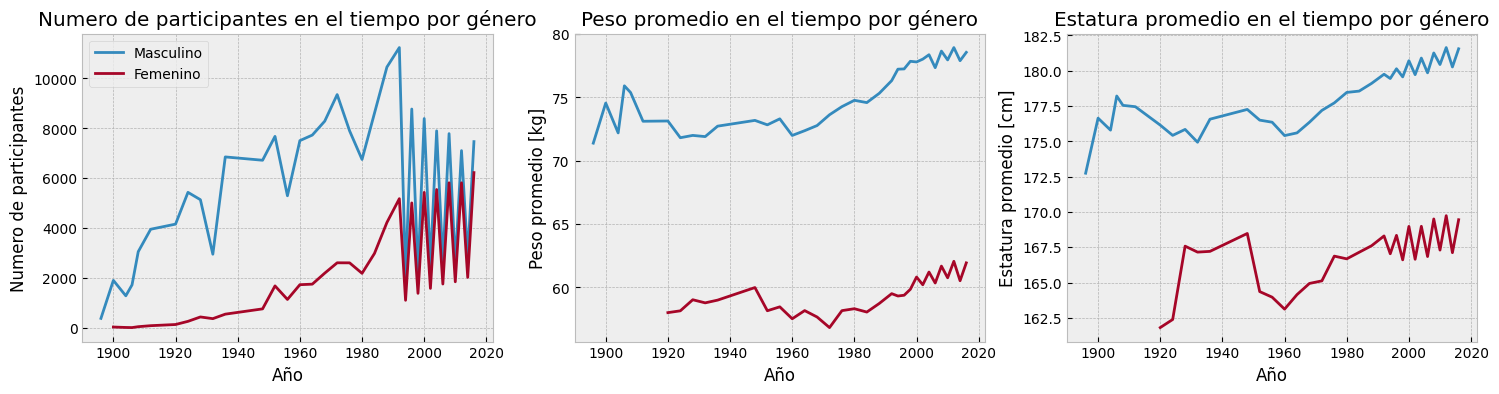

In [106]:
# Graficos de evolucion temporal
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(18, 4), nrows=1, ncols=3)

ax1.plot(x1m, y1m, label="Masculino")
ax1.plot(x1f, y1f, label="Femenino")
ax1.set_title("Numero de participantes en el tiempo por género")
ax1.set_xlabel("Año")
ax1.set_ylabel("Numero de participantes")
ax1.legend()

ax2.plot(x2m, y2m, label="Masculino")
ax2.plot(x2f, y2f, label="Femenino")
ax2.set_title("Peso promedio en el tiempo por género")
ax2.set_xlabel("Año")
ax2.set_ylabel("Peso promedio [kg]")
# ax2.legend()

ax3.plot(x3m, y3m, label="Masculino")
ax3.plot(x3f, y3f, label="Femenino")
ax3.set_title("Estatura promedio en el tiempo por género")
ax3.set_xlabel("Año")
ax3.set_ylabel("Estatura promedio [cm]")
# ax3.legend()

### Medallero olimpico

In [116]:
# Reemplazar valores NaN de la columna "Medal" con el texto "No Medal"
df["Medal"] = df["Medal"].replace(to_replace=np.nan, value="No Medal")

In [128]:
# Codificar columna adicional que representa las medallas. Si hay medalla es 1, 0 sino.
df["Medal_Code"] = pd.Series([0 if x == "No Medal" else 1 for x in df["Medal"]])
df["Medal_Code"]

In [145]:
# Agrupar datos del medallero por pais y por tipo de medalla
df_medallero = df[["Team", "Medal", "Medal_Code"]
                  ].groupby(["Team", "Medal"]).sum()
# df_medallero.sort_values(["Medal_Code"], ascending=False)
df_top_ten = df_medallero.xs("Gold", level=1, drop_level=False).sort_values("Medal_Code", ascending=False)[:10]
df_top_ten

,,Medal_Code
Team,Medal,
United States,Gold,2474
Soviet Union,Gold,1058
Germany,Gold,679
Italy,Gold,535
Great Britain,Gold,519
France,Gold,455
Sweden,Gold,451
Hungary,Gold,432
Canada,Gold,422
